## Нахождение минимума функций 
Постановка задачи

$U - $ множество допустимых решений.  
Определена функция $f(x), x \in U$. 

Предполагается, что функция ограничена снизу.  
Без ограничения общности будем считать, что $f(x) \ge 0$

* Поиск $x^* \in U$ т. ч. $f(x^*) = \displaystyle\min_{x \in U}(f(x))$
* Поиск минимизирующей последовательности ${x_n}  \subset U$ т. ч.  $f(x_n) \rightarrow \displaystyle\min_{x \in U}(f(x))$

## Градиентный спуск
Градиентный спуск - численный метод нахождения локального минимума или максимума функции с помощью движения вдоль градиента, один из основных численных методов современной оптимизации.

$x_0 -$ начальное приближение

минимизирующая последовательность $x^{i+1}=x^i - \lambda^i \nabla f(x^i)$

где $\lambda$ определяет скорость градиентного спуска. В качестве скорости градиентного спуска может быть выбрана:
* $\lambda -$ константа
* $\lambda -$ убывающая последовательность
* $\lambda(\lambda^{i-1},f(x^i),\nabla f(x^i))$ 

градиентный спуск заканчивается, если:
* $x^i$ вышел за границы определения $X$
* $|f(x^i) - f(x^{i-1})| < \epsilon$, $\epsilon -$ заданное малое число.   
* достигнут лимит итераций



## Задание № 1  
реализовать градиентной спуск в виде функции:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [21]:
# задаем функцию
def f1(x):
    # return pow(x - 5, 2) - 5
    return math.sin(x)


# и производную функции
def df1dx(x, h):
    return (f1(x + h) - f1(x - h)) / (2 * h)

In [22]:
# сам градиентный спуск
def gradient_descent(x_new, f, lamb=0.3, alpha=0, epsilon=1E-6, max_iter=1E6):
    plt.scatter(x_new, f(x_new), color='r')
    iter = 0
    x_old = x_new + epsilon + 1
    while abs(x_old - x_new) > epsilon and iter < max_iter:
        iter += 1
        x_old = x_new
        x_new = x_new - lamb * df1dx(x_new, epsilon)
        lamb = lamb * (1 - alpha)
        plt.annotate('', xy=(x_new, f(x_new)), xytext=(x_old, f(x_old)), arrowprops=dict(width=0.5, color='r'))
        # plt.scatter(x_new, f(x_new), color = 'r')
    return x_new

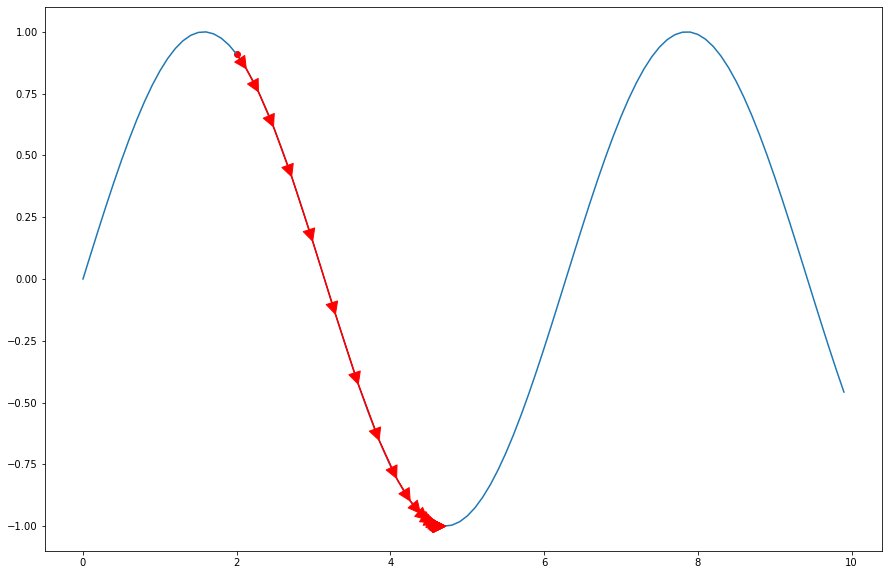

In [23]:
# начальные данные
start = 0
stop = 10
x0 = 2
x_plot = np.arange(start, stop, 0.1)
y_plot = [f1(x) for x in x_plot]
plt.figure(figsize=(15, 10))
plt.plot(x_plot, y_plot)
gradient_descent(x0, f1)

plt.show()

In [24]:
# задаем функцию двух переменных
def f2(x, y):
    # return pow(x - 5, 2) - 5
    return -np.sin(x) + np.sin(y) + 2


# и частные производные функции
def df2dx(x, y, h):
    return (f2(x + h, y) - f2(x - h, y)) / (2 * h)


def df2dy(x, y, h):
    return (f2(x, y + h) - f2(x, y - h)) / (2 * h)

In [25]:
# сам градиентный спуск
def gradient_descent(x_new, y_new, f, lamb=0.3, alpha=0, epsilon=1E-6, max_iter=1E6):
    plt.scatter(x_new, y_new, color='r')
    iter = 0
    x_old = x_new + epsilon + 1
    y_old = y_new + epsilon + 1
    while (abs(x_old - x_new) > epsilon or abs(y_old - y_new) > epsilon) and iter < max_iter:
        iter += 1
        x_old = x_new
        y_old = y_new
        x_new = x_new - lamb * df2dx(x_new, y_new, epsilon)
        y_new = y_new - lamb * df2dy(x_new, y_new, epsilon)
        lamb = lamb * (1 - alpha)
        plt.annotate('', xy=(x_new, y_new), xytext=(x_old, y_old), arrowprops=dict(width=0.5, color='r'))
        # plt.arrow(x_old, f(x_old), x_new - x_old, f(x_new) - f(x_old), color='r', head_width=0.1)
        # plt.scatter(x_new, f(x_new), color = 'r')
    return x_new, y_new

(1.5707963738933444, 4.712387206305067)


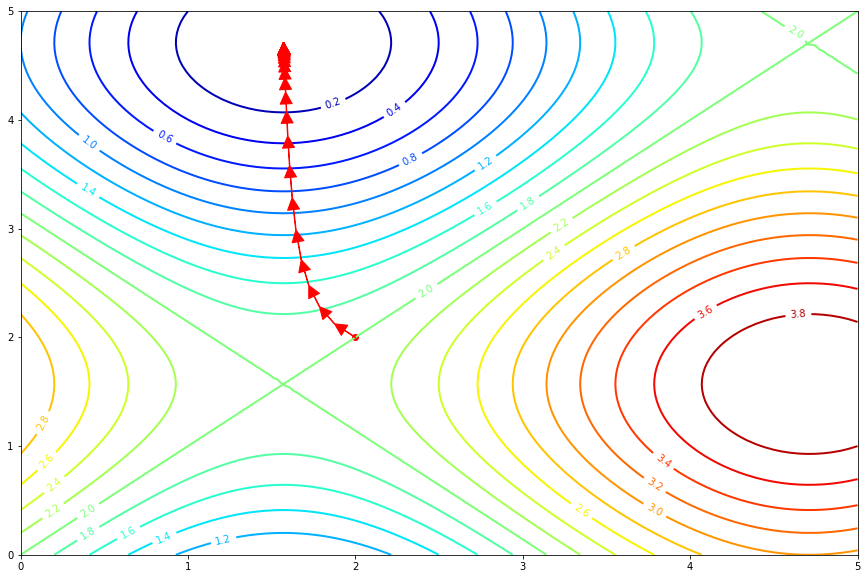

In [26]:
# начальные данные
x_start = 0
x_stop = 5
y_start = 0
y_stop = 5
x0 = 2
y0 = 2

x = np.linspace(x_start, x_stop, 100)
y = np.linspace(y_start, y_stop, 100)
X, Y = np.meshgrid(x, y)
f = f2(X, Y)

plt.figure(figsize=(15, 10))
ptr = plt.contour(X, Y, f, cmap=plt.cm.jet, linewidths=2, levels=20)
plt.clabel(ptr, inline=1, fontsize=10)
print(gradient_descent(x0, y0, f))

plt.show()

* $X0 -$ начальное приближение в виде np.array([x0, x1, x2, ... xn])
* $F -$ функция, принимает один аргумент вида np.array([x0, x1, x2, ... xn]), возвращает единственное число (значение функции)
* $lamb -$ начальное значение скорости градиентного спуска
* $alpha -$ коэффициент уменьшения скорости. $\lambda^i = \lambda^{i-1}(1 - \alpha)$ 
* $epsilon -$ малое число, ошибка при которой расчет заканчивается
* $max_iter -$ максимальное количество итераций после которых расчет заканчивается. В этом случае выводится предупреждение и сообщается достигнутая ошибка.  

Показать с помощью gradient_descent работу градиентного спуска для функции одного и двух аргументов. Для этого построить график (график для функции 1 переменной, для функции 2х переменных - контурную карту). И отложить минимизирующую последовательность.  

Обратите внимание. Все должно строится автоматически, при задании начального приближения и области изменения X0. 

Пример для функции 1 переменной:    
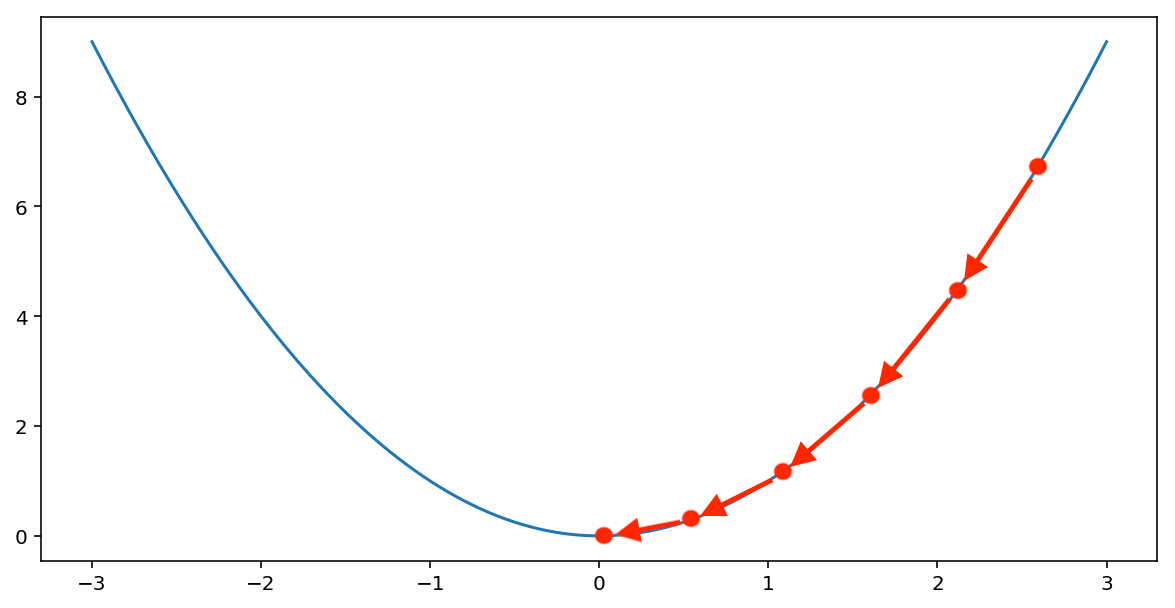

Пример для функции 2х переменных:
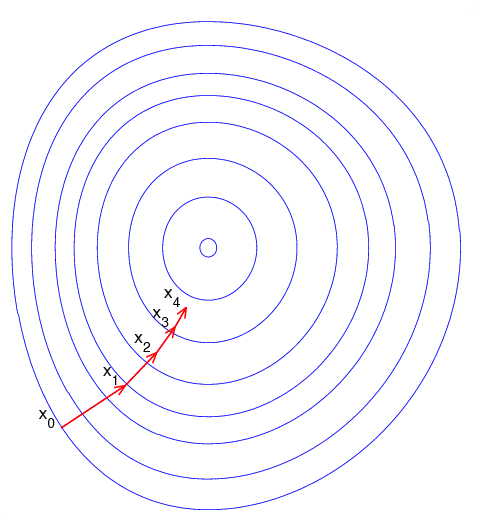



# пример построения контурных и тепловых карт

In [30]:
def F(X):
    return -np.sin(X[0]) + np.sin(X[1]) + 2

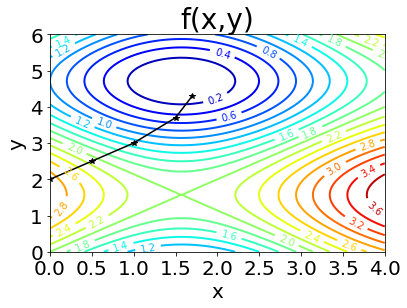

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# задаём диапазоны изменения параметров x и y
Xmin = (0, 0)
Xmax = (4, 6)

# сначала готовим данные для построения графиков
x = np.linspace(Xmin[0], Xmax[0], 100)
y = np.linspace(Xmin[1], Xmax[1], 100)

# теперь готовим двумерную сетку координат...
X, Y = np.meshgrid(x, y)  # функция преобразует одномерные массивы в двумерную сетку
# ... значения искомой функции
f = F((X, Y))

# теперь строим карту
ptr = plt.contour(X, Y, f, cmap=plt.cm.jet, linewidths=2, levels=20)
# cmap - цветовая схема для отрисовки линий уровня
# linewidths - толщина линий (может быть как число, так и массив значений)
# levels - число эквипотенциалей (можно задать массив значений f, на которых должны быть заданы линии уровня)
# обратите внимание на наличие Х-точки и сепаратрисы - асимптот, отделяющих семейства кривых друг от друга

# добавим подписи значений функции для каждой линии уровня
plt.clabel(ptr, inline=1, fontsize=10)

# добавим подписи к осям и принудительно отрисуем объекты на холсте
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('f(x,y)', fontsize=28)
plt.xticks(fontsize=20)  # Еще один способ задать размер меток на осях
plt.yticks(fontsize=20)

#Добавление шагов градиентного спуска. Последовательности Xn и Yn вам нужно получить самостоятельно
Xn = [0.0, 0.5, 1.0, 1.5, 1.7]
Yn = [2.0, 2.5, 3.0, 3.7, 4.3]
plt.plot(Xn, Yn, '-k*')

plt.show()

# полный список параметров, которые можно передать в функцию, можно найти по
# адресу https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html

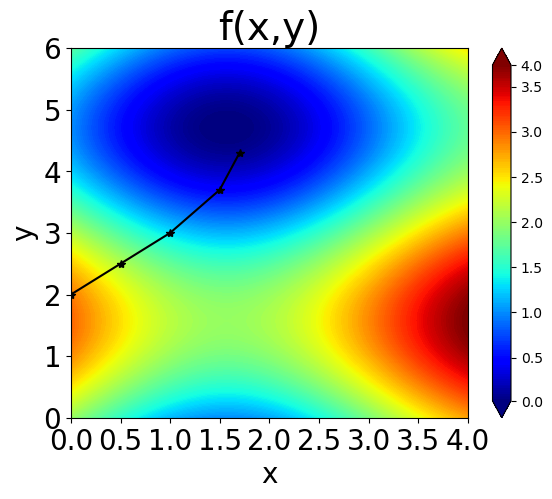

In [51]:
# задаём диапазоны изменения параметров x и y
Xmin = (0, 0)
Xmax = (4, 6)

# сначала готовим данные для построения графиков
x = np.linspace(Xmin[0], Xmax[0], 100)
y = np.linspace(Xmin[1], Xmax[1], 100)

# теперь готовим двумерную сетку координат...
X, Y = np.meshgrid(x, y)  # функция преобразует одномерные массивы в двумерную сетку
# ... значения искомой функции
f = F((X, Y))

# теперь строим карту - обратите внимание на вызов contourf
ptr = plt.contourf(X, Y, f, cmap=plt.cm.jet, levels=200, extend='both')
# cmap - цветовая схема для отрисовки линий уровня
# levels - число эквипотенциалей (можно задать массив значений f, на которых должны быть заданы линии уровня) для построения карты
# extend - необязательный параметр, указывающий необходимость расширения значений на цветовой шкале значений
# цвет в уголке на конце шкалы отмечает все значения функции f, выходящие за предельные значения на цветовой шкале

# вместо подписей для линий уровня при построении тепловой карты строится цветовая шкала
plt.colorbar(ptr, ticks=[i for i in np.linspace(0., 4, 9)])

# добавим подписи к осям и принудительно отрисуем объекты на холсте
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('f(x,y)', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#Добавление шагов градиентного спуска. Последовательности Xn и Yn вам нужно получить самостоятельно
Xn = [0.0, 0.5, 1.0, 1.5, 1.7]
Yn = [2.0, 2.5, 3.0, 3.7, 4.3]
plt.plot(Xn, Yn, '-k*')

plt.show()


## Алгоритм имитации отжига

Суть метода

Эмпирические параметры: $T_0, g(\xi, x), 𝜉, \alpha$

$x_0 -$ начальное значение


псевдо код

1. случайным образом по заданному распределению вычисляем $\xi$
2. $x^*= g(\xi,x^i)$
3. $\Delta = f(x^*) - f(x^i)$
4. Если $\Delta < 0$, то:  
$x^{i+1} = x^*$  
иначе:  
    1. вычисляем $\eta = R(0,1)$  
    2. если $\eta < exp(-\frac{\Delta}{T_i})$, то  
    $x^{i+1} = x^*$  
    иначе  
    $x^{i+1} = x^i$
5. $T_{i+1} = \alpha T_i$
6. Переход к 1

где $T_0 -$ "температура". По значение сопоставима с F(x), $\alpha -$ парметр уменьшения температуры, $\alpha \in (0,1)$, обычно задается 0.95 - 0.98. $\xi -$ разыгрываемая величина, $g(\xi,x) -$ функция шага, $R(0,1) -$ равномерное распределение от 0 до 1. 


Алгоритм заканчивается, если:
* $x^i$ вышел за границы определения $X$
* T_k стало очень маленьким.   
* достигнут лимит итераций

Обратите внимание, алгортим может не сходится!

In [ ]:
def anneal(f, T, g, ksi_func, alpha, x_current, limits):
    iter = 0
    while x in limits and T > epsilon and iter < max_iter:
        iter += 1
        ksi = ksi_func
        x = g(ksi, x_current)
        delta = f(x) - f(x_current)
        if delta < 0:
            x_current = x
        else:
            eta = np.random.choice(np.linspace(0, 1, 0.001))
            if eta < math.exp(-delta / T):
                x_current = x
            else:
                pass
        T = alpha * T

## Задание №2

Реализовать алгоритм имитации отжига для функции:  
$f(x) = x^2|2 + sin(4x)|$  
Начальное приближение $x_0 \in (-10, 10)$  
$g(\xi, x) = \xi + x$  
$\xi = R(-1,1)$  
$T_0 = 100$  
$\alpha = 0.95$

Построить график функции и наложить минимизирующую последовательность

In [27]:
def f1(x):
    return pow(x, 2) * abs(2 + math.sin(4 * x))

In [28]:
def g(ksi, x):
    return ksi + x

In [29]:
def r():
    return np.random.choice(np.arange(-1, 1, 0.001))

In [30]:
def anneal(f, T, g, ksi_func, alpha, x_current, limits, epsilon=1E-6, max_iter=1E6):
    iter = 0
    while T > epsilon and iter < max_iter:
        iter += 1
        x_old = x_current
        ksi = ksi_func()
        x = g(ksi, x_current)
        delta = f(x) - f(x_current)
        if delta < 0:
            x_current = x
        else:
            eta = np.random.choice(np.arange(0, 1, 0.001))
            if eta < math.exp(-delta / T):
                x_current = x
            else:
                pass
        T = alpha * T
        # plt.annotate('', xy=(x_current, f(x_current)), xytext=(x_old, f(x_old)), arrowprops=dict(width=0.5, color='r'))
        plt.plot([x_current, x_old], [f(x_current), f(x_old)], c='r')
    plt.scatter(x_current, f(x_current), c='g')
    return x_current

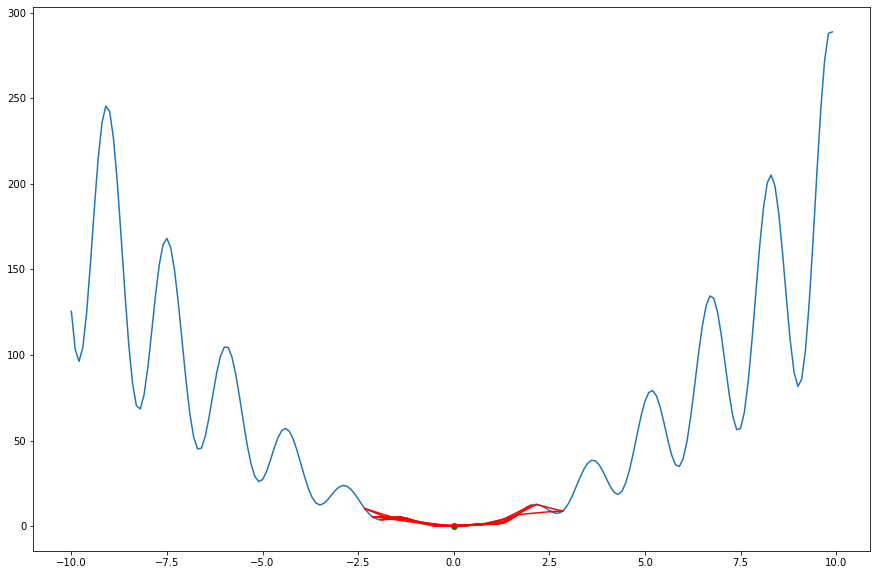

In [31]:
T = 100
alpha = 0.95
limits = np.arange(-10, 10, 0.01)
x_plot = np.arange(limits[0], limits[-1:], 0.1)
y_plot = [f1(x) for x in x_plot]
plt.figure(figsize=(15, 10))
plt.plot(x_plot, y_plot)
anneal(f1, T, g, r, alpha, np.random.choice(limits), limits)

plt.show()

## Задание №3

Реализовать алгоритм имитации отжига для функции:  
$f(X) = X[0]^2|2 + sin(4X[0])| + X[1]^2|2 + sin(4X[1])|$

Построить контурную карту и наложить минимизирующую последовательность

In [32]:
def f2(x, y):
    return pow(x, 2) + np.sin(4 * x) + pow(y, 2) + np.sin(4 * y)

In [42]:
def anneal(f, T, g, ksi_func, alpha, x_current, y_current, limits_x, limits_y, epsilon=1E-6, max_iter=1E6):
    iter = 0
    while T > epsilon and iter < max_iter:
        iter += 1
        x_old = x_current
        y_old = y_current
        ksi = ksi_func()
        x = g(ksi, x_current)
        ksi = ksi_func()
        y = g(ksi, x_current)
        delta = f(x, y) - f(x_current, y_current)
        if delta < 0:
            x_current = x
            y_current = y
        else:
            eta = np.random.choice(np.arange(0, 1, 0.001))
            if eta < math.exp(-delta / T):
                x_current = x
                y_current = y
            else:
                pass
        T = alpha * T
        # plt.annotate('', xy=(x_current, f(x_current)), xytext=(x_old, f(x_old)), arrowprops=dict(width=0.5, color='r'))
        plt.plot([x_current, x_old], [y_current, y_old], c='r')
    plt.scatter(x_current, y_current, c='g')
    return x_current

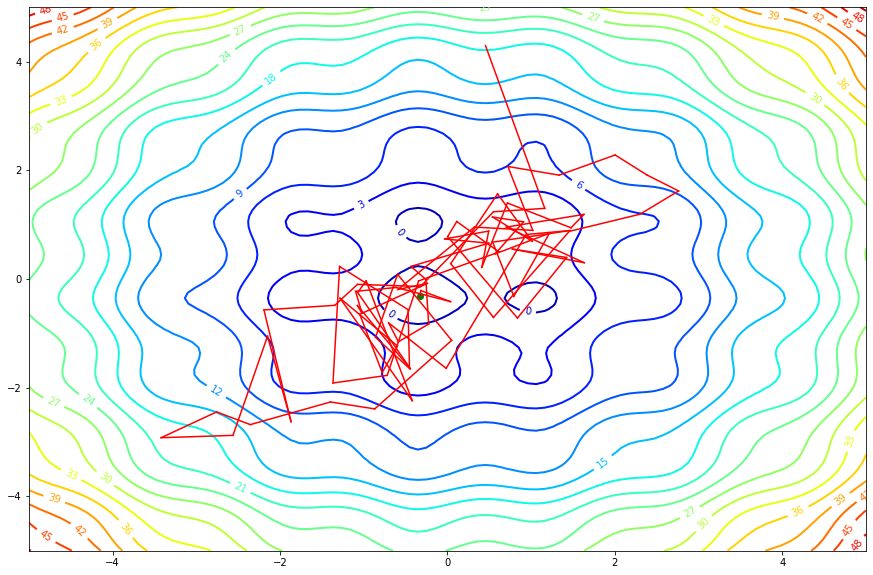

In [52]:
# начальные данные
x_start = -5
x_stop = 5
y_start = -5
y_stop = 5
x = np.linspace(x_start, x_stop, 100)
y = np.linspace(y_start, y_stop, 100)
x0 = np.random.choice(x)
y0 = np.random.choice(y)
X, Y = np.meshgrid(x, y)
f = f2(X, Y)

plt.figure(figsize=(15, 10))
ptr = plt.contour(X, Y, f, cmap=plt.cm.jet, linewidths=2, levels=20)
plt.clabel(ptr, inline=1, fontsize=10)
anneal(f2, T, g, r, alpha, np.random.choice(x), np.random.choice(y), x, y)

plt.show()

## Задание №4

Реализовать алгоритм имитации отжига для задачи о расстановке N ферзей на шахматной доске  
Начальное приближение  
$x_0 = [0,1,2,3,...N]$  
$f(x) -$ количество мешающих друг другу ферзей в расстановке x  
$g(\xi,\psi,x) = swap(x[\xi],x[\psi])$  
$swap(a,b) -$ функция меняет элементы a и b местами  
$\xi, \psi -$ случайно (равновероятно) выбираются из множества {0,1,2,3,...N-1}  
$T_0 = 100$  
$\alpha = 0.95$

Если найдено решение ($f(x) = 0$, то необходимо завершить программу, вывести расстановку (функция ниже) и количество проведенных итераций.


In [91]:
import seaborn as sns

In [126]:
def interfering(x, N):
    interfere = 0
    # на диагонали
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if x[i] == x[j]:
                interfere += 1
            if abs(x[i] - x[j]) == abs(i - j):
                interfere += 1
    return interfere

In [125]:
for i in range(10):
    for j in range(i+1, 10):
        print(i, j)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 4
3 5
3 6
3 7
3 8
3 9
4 5
4 6
4 7
4 8
4 9
5 6
5 7
5 8
5 9
6 7
6 8
6 9
7 8
7 9
8 9


In [78]:
def g(x, N):
    f = True
    while f:
        i = np.random.choice(N)
        j = np.random.choice(N)
        if i != j:
            x[i], x[j] = x[j], x[i]
        f = False
    return x

In [153]:
def anneal(x_current, N, T, alpha, epsilon=1E-8, max_iter=1E6):
    iter = 0
    while T > epsilon and iter < max_iter and interfering(x_current, N) != 0:
        iter += 1
        x = g(x_current, N)
        delta = interfering(x, N) - interfering(x_current, N)
        if delta < 0:
            x_current = x
        else:
            eta = np.random.choice(np.arange(0, 1, 0.001))
            if eta < math.exp(-delta / T):
                x_current = x
            else:
                pass
        T = alpha * T
    # print(T, iter)
    return x_current

In [86]:
#функция вывода ферзей
def print_position(position):
    N = len(position)
    for i in range(N):
        print(" _", end="")

    print("", end="\n")

    for i in range(N):
        print("", end="|")
        for j in range(N):
            if j == position[i]:
                print("F", end="")
            else:
                print("O", end="")
            print("", end="|")
        print("", end="\n")

    for i in range(N):
        print(" \u203E", end="")
    print("", end="\n")

In [156]:
best = N
for i in range(1000):
    N = 10
    x0 = [i for i in range(N)]
    solve = anneal(x0, N, T, alpha)
    if interfering(solve, N) < best:
        best_solve = solve
        best = interfering(solve, N)
print(best_solve, best)

[8, 5, 2, 4, 1, 7, 9, 3, 6, 0] 0


<AxesSubplot:>

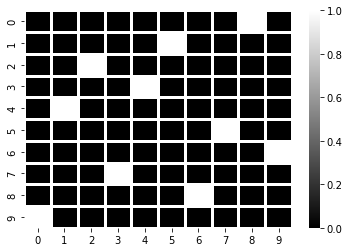

In [157]:
chess_board = [[1 if i == j else 0 for i in range(N)] for j in best_solve]
sns.heatmap(chess_board, linewidths=3, cmap= 'gist_gray')